# Demo using svmbir for forward projection and for reconstructions using each of QGGMRF and the proximal-map formulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svmbir

## Load Sinogram Data

In [4]:
sino = np.load('../../../demo/sinodata.npy')

(num_views, num_slices, num_channels) = sino.shape
angles = np.linspace(0, np.pi, num_views, endpoint=False)

## Running qggmrf Reconstruction

In [7]:
x = svmbir.recon(sino, angles, 
    center_offset=-6, num_threads=4,
    sigma_y=1, sigma_x=0.6350, T=0.000478, max_iterations=10)

Found system matrix: /Users/damonli/.cache/svmbir_lib/sysmatrix/8cef2fa9e15d0984eba1.2Dsvmatrix


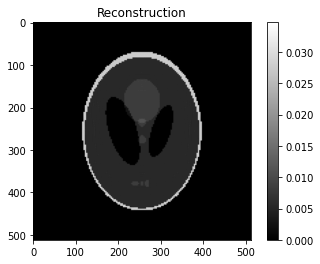

In [15]:
imgplot = plt.imshow(x[0])
imgplot.set_cmap('gray')
plt.colorbar()
plt.title('Reconstruction')
plt.show()
plt.close()

## Running Forward projection

In [9]:
proj = svmbir.project(angles, x, num_channels, center_offset=-6, num_threads=4)

Found system matrix: /Users/damonli/.cache/svmbir_lib/sysmatrix/8cef2fa9e15d0984eba1.2Dsvmatrix


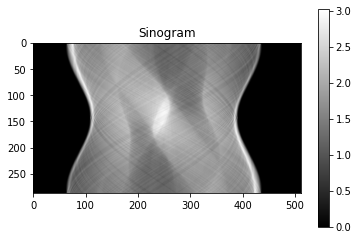

In [16]:
imgplot = plt.imshow(np.swapaxes(sino, 0, 1)[0])
imgplot.set_cmap('gray')
plt.colorbar()
plt.title('Sinogram')
plt.show()
plt.close()

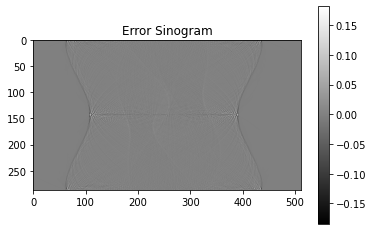

In [18]:
imgplot = plt.imshow(np.swapaxes(sino-proj, 0, 1)[0])
imgplot.set_cmap('gray')
plt.colorbar()
plt.title('Error Sinogram')
plt.show()
plt.close()

## Running Proximal-map Reconstruction

In [12]:
x_rot = np.swapaxes(x, 1, 2)
x_combined = svmbir.recon(sino, angles, 
    center_offset=-6, num_threads=4, prox_image=x_rot,
    sigma_y=1, sigma_x=0.01, T=0.000478, max_iterations=10)

Found system matrix: /Users/damonli/.cache/svmbir_lib/sysmatrix/8cef2fa9e15d0984eba1.2Dsvmatrix


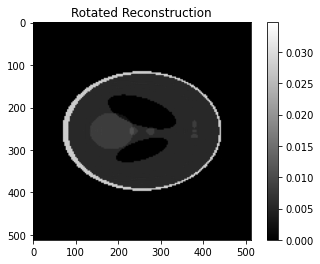

In [19]:
imgplot = plt.imshow(x_rot[0])
imgplot.set_cmap('gray')
plt.colorbar()
plt.title('Rotated Reconstruction')
plt.show()
plt.close()

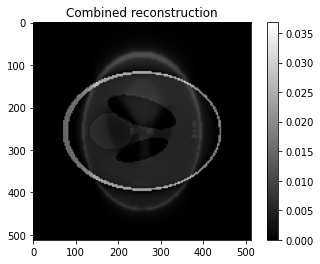

In [20]:
imgplot = plt.imshow(x_combined[0])
imgplot.set_cmap('gray')
plt.colorbar()
plt.title('Combined reconstruction')
plt.show()
plt.close()